In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from gtda.time_series import SingleTakensEmbedding
from gtda.plotting import plot_point_cloud
from gtda.homology import VietorisRipsPersistence

import kmapper as km
from kmapper.jupyter import display
import sklearn

def plot_seasonal_time_series(data, season, year, var):
    frame = data[(data["Season"] == season) & (data["Year"] == year)]
    
    if var == "Temp":
        frame = frame[["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp", "date", "Month"]]
        title = 'Temperature '
    elif var == "Prec":
        frame = frame[["r1_prec", "r2_prec", "r3_prec", "r4_prec", "r5_prec", "r6_prec", "r7_prec", "r8_prec", "r9_prec", "date", "Month"]]
        title = 'Precipitation '
    
    title = title + 'during the ' + season + ' in ' + str(year)

    fig, axs = plt.subplots(9, 1, figsize = (15,20), facecolor = "w", edgecolor = "k")
    fig.subplots_adjust(hspace = .2, wspace=.09)
    axs = axs.ravel()

    frame_cols = frame.columns

    for i in range(len(frame_cols)):
        if i == 9:
            break
        else:
            frame[frame_cols[i]].groupby(frame["Month"]).plot(ax = axs[i])
            axs[i].set_title(frame_cols[i])

    plt.suptitle(title,fontsize=20)
    fig.tight_layout(rect=[0, 0.03, 1, 0.975])
    plt.show()

def plot_seasonal_scatterplot(data, season, year):
    frame = data[(data["Season"] == season) & (data["Year"] == year)]

    prec = ["r1_prec", "r2_prec", "r3_prec", "r4_prec", "r5_prec", "r6_prec", "r7_prec", "r8_prec", "r9_prec"]
    temp = ["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp"]

    title = 'Precipitation vs temperature scatterplots during the ' + season + ' in ' + str(year)

    fig, axs = plt.subplots(3, 3, figsize = (20,20), facecolor = "w", edgecolor = "k")
    fig.subplots_adjust(hspace = .2, wspace=.09)
    axs = axs.ravel()


    for i in range(9):
        if i == 9:
            break
        else:
            frame.groupby(frame["Month"]).plot.scatter(prec[i], temp[i], ax = axs[i])

    plt.suptitle(title,fontsize=20)
    fig.tight_layout(rect=[0, 0.03, 1, 0.975])
    plt.show()

In [2]:
df = pd.read_csv("final_db.csv")
df 

,date,flow,r1_temp,r2_temp,r3_temp,r4_temp,r5_temp,r6_temp,r7_temp,r8_temp,...,r4_prec,r5_prec,r6_prec,r7_prec,r8_prec,r9_prec,Year,Month,Day,Season
0,1958-01-04,1.723781,-12.8,-13.000000,-13.0,-12.5,-12.500000,-12.7,-12.000000,-12.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1958,1,4,Winter
1,1958-01-05,0.960882,-7.8,-7.900000,-8.4,-7.0,-7.300000,-8.6,-6.500000,-7.7,...,3.3,3.7,0.7,3.1,4.2,1.1,1958,1,5,Winter
2,1958-01-06,0.001000,-11.0,-9.900000,-6.5,-8.5,-9.000000,-7.4,-7.900000,-6.8,...,12.5,11.2,12.2,14.1,14.2,10.5,1958,1,6,Winter
3,1958-01-07,0.001000,-13.2,-12.200000,-7.9,-10.7,-11.300000,-9.8,-10.100000,-8.5,...,7.3,6.5,5.2,10.4,5.7,3.7,1958,1,7,Winter
4,1958-01-08,0.316796,-19.9,-19.299999,-15.4,-18.4,-18.700001,-16.9,-17.700001,-15.9,...,3.5,3.8,3.3,2.9,4.0,3.5,1958,1,8,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21173,2015-12-27,2.177040,-12.5,-11.700000,-8.6,-11.0,-10.900000,-9.2,-9.700000,-8.4,...,1.5,0.1,0.0,0.0,0.0,0.0,2015,12,27,Fall
21174,2015-12-28,4.876250,-12.5,-11.900000,-9.1,-11.4,-11.200000,-9.8,-10.600000,-8.6,...,6.1,3.7,5.0,5.4,0.0,5.1,2015,12,28,Fall
21175,2015-12-29,4.998840,-11.9,-11.400000,-8.4,-10.8,-10.800000,-8.6,-9.300000,-7.2,...,2.7,0.2,0.8,2.2,0.0,0.0,2015,12,29,Fall
21176,2015-12-30,4.428777,-7.0,-6.500000,-3.4,-5.9,-6.100000,-4.8,-5.000000,-3.8,...,5.1,3.5,3.4,3.2,0.0,3.6,2015,12,30,Fall


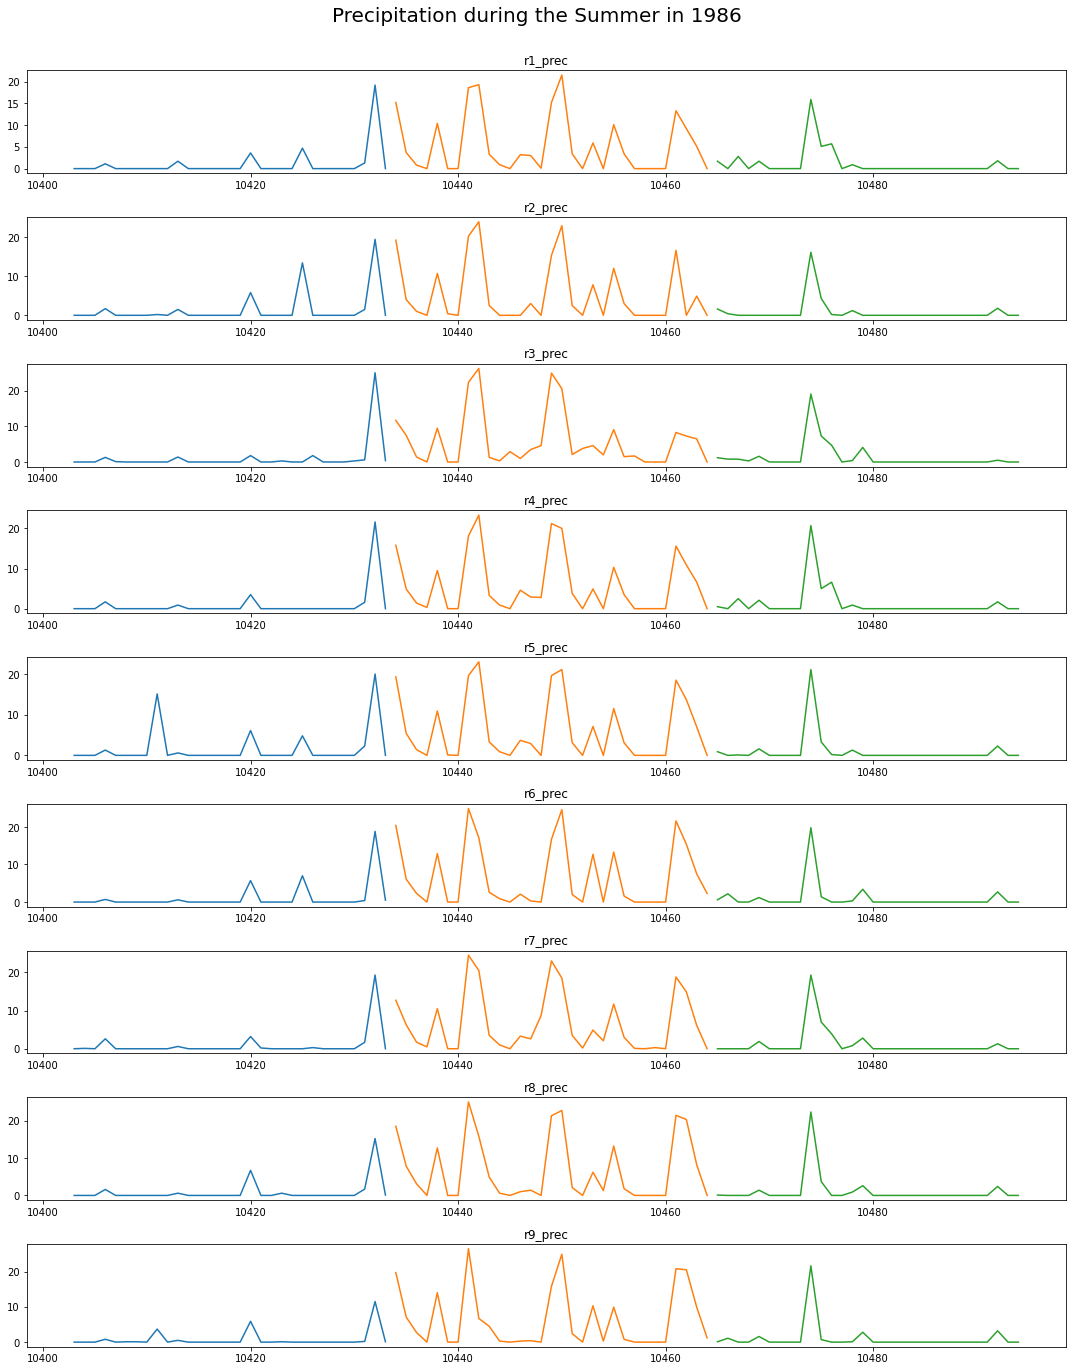

In [3]:
plot_seasonal_time_series(df, "Summer", 1986, "Prec")

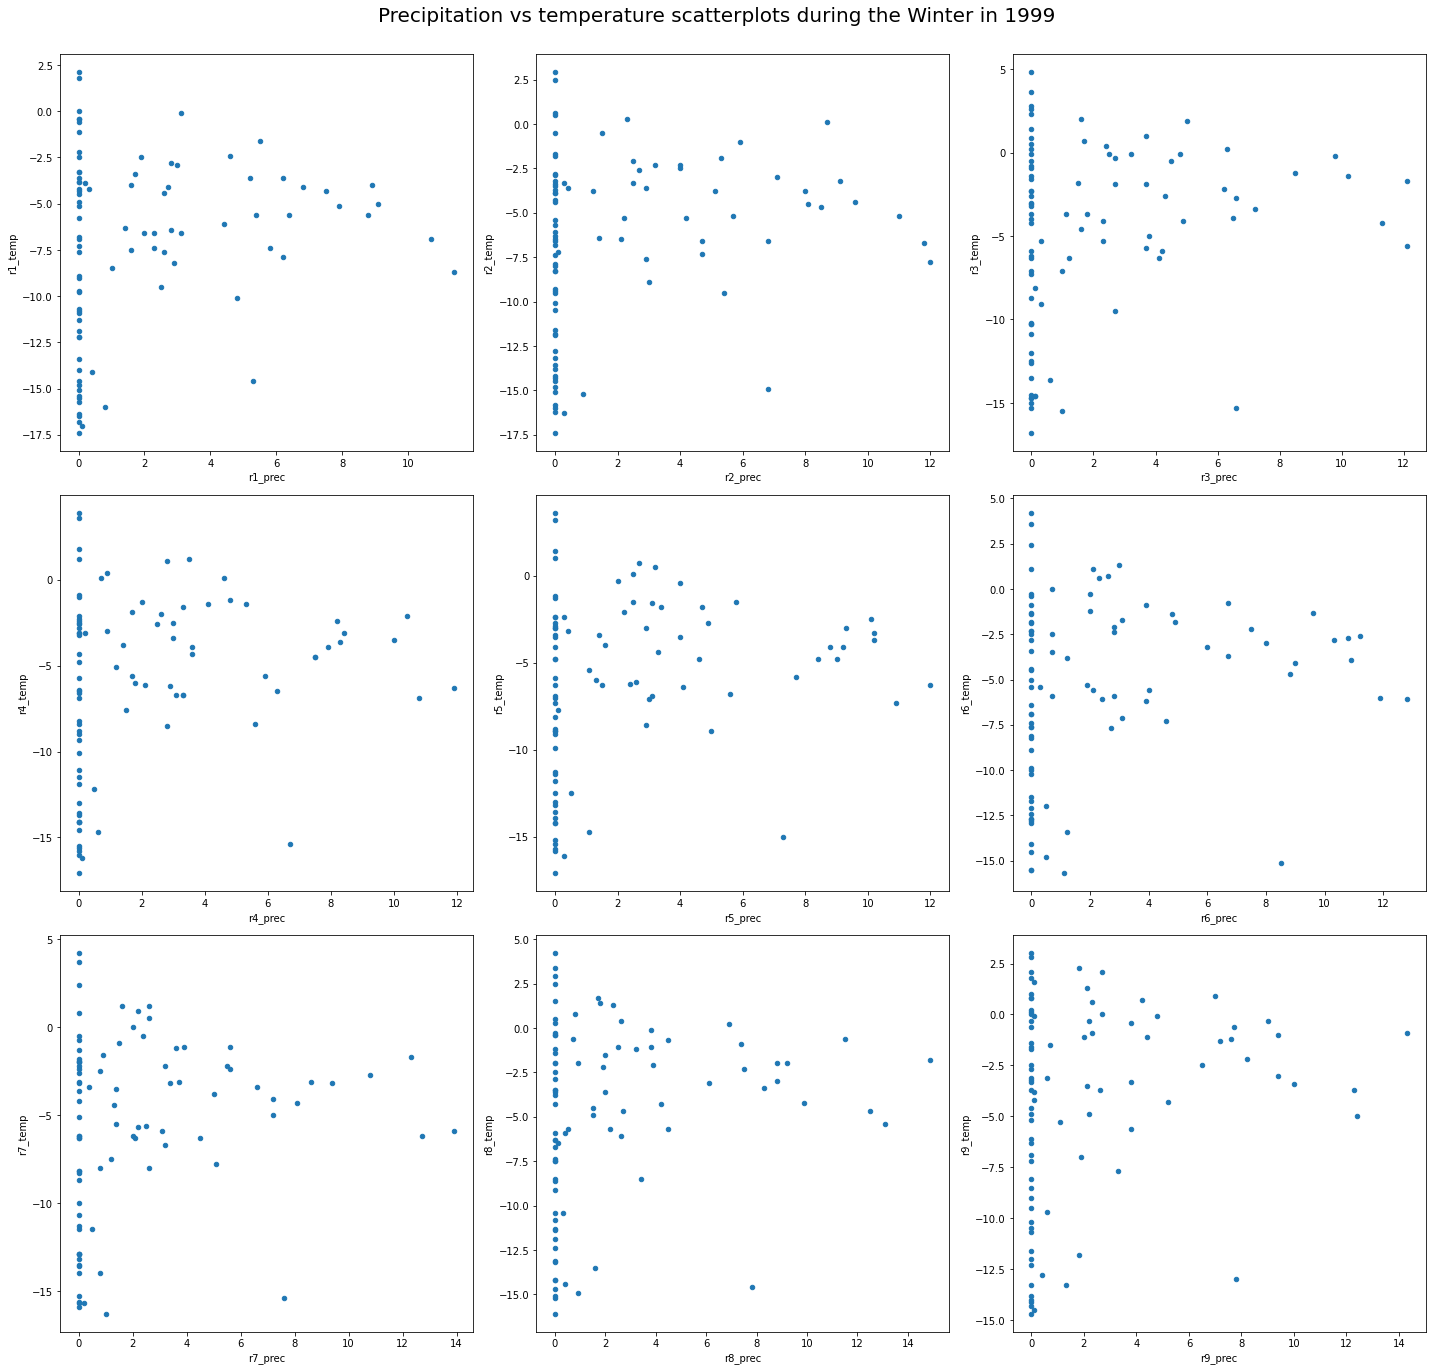

In [4]:
plot_seasonal_scatterplot(df, "Winter", 1999)

## Conversión de una serie de tiempo no periódica a una nube de puntos

In [5]:
x = np.linspace(0, len(df["date"]), len(df["date"]))
y = df["r1_temp"]

fig = go.Figure(data=go.Scatter(x=x, y=y))
title = y.name + ' time series'
fig.update_layout(title=title, xaxis_title="Timestamp", yaxis_title="Amplitude")

fig.show()

In [6]:
embedding_dimension_nonperiodic = 2
embedding_time_delay_nonperiodic = 16
stride = 3

embedder_nonperiodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_nonperiodic,
    dimension=embedding_dimension_nonperiodic,
    stride=stride,
)

y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(y)

plot_point_cloud(y_nonperiodic_embedded)

## Se realiza análisis de series de tiempo para intervalo de tiempo dado

In [7]:
def analyze_time_interval(data, starting_year, longitude, var, region, dimension):
    to_plot = data[(data["Year"] >= starting_year) & (data["Year"] <= starting_year+longitude)]
    temp="r"+str(region)+"_temp"
    prec="r"+str(region)+"_prec"
    to_plot = to_plot[[temp, prec, "flow"]]

    if var == "Temp":
        to_plot = to_plot[temp]
    elif var == "Prec":
        to_plot = to_plot[prec]
    elif var == "Flow":
        to_plot = to_plot["flow"]

    x = np.linspace(0, len(to_plot), len(to_plot))
    y = to_plot

    fig = go.Figure(data=go.Scatter(x=x, y=y))
    fig.update_layout(xaxis_title="Tiempo", yaxis_title= var)
    fig.show()

    embedding_dimension_nonperiodic = dimension
    embedding_time_delay_nonperiodic = 10
    stride = 10

    embedder_nonperiodic = SingleTakensEmbedding(
        parameters_type="fixed",
        n_jobs=2,
        time_delay=embedding_time_delay_nonperiodic,
        dimension=embedding_dimension_nonperiodic,
        stride=stride)

    y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(y)
    
    return y_nonperiodic_embedded

In [8]:
example = analyze_time_interval(df, 2000, 0.5, "Temp", 3, 2)

In [9]:
plot_point_cloud(example)

In [17]:
y_periodic_embedded = example[None, :, :]
y_nonperiodic_embedded = y_nonperiodic_embedded[None, :, :]

from gtda.homology import VietorisRipsPersistence

# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

periodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for periodic signal")
periodic_persistence.fit_transform_plot(y_periodic_embedded)

Persistence diagram for periodic signal


array([[[ 0.        ,  0.39999998,  0.        ],
        [ 0.        ,  0.60827613,  0.        ],
        [ 0.        ,  0.78102487,  0.        ],
        [ 0.        ,  0.80622584,  0.        ],
        [ 0.        ,  1.10000038,  0.        ],
        [ 0.        ,  1.11803401,  0.        ],
        [ 0.        ,  1.17046976,  0.        ],
        [ 0.        ,  1.30000007,  0.        ],
        [ 0.        ,  1.42126775,  0.        ],
        [ 0.        ,  1.43178272,  0.        ],
        [ 0.        ,  1.48660684,  0.        ],
        [ 0.        ,  1.48660719,  0.        ],
        [ 0.        ,  1.67630494,  0.        ],
        [ 0.        ,  1.67630541,  0.        ],
        [ 0.        ,  1.7720052 ,  0.        ],
        [ 0.        ,  2.02484584,  0.        ],
        [ 0.        ,  2.15870333,  0.        ],
        [ 0.        ,  2.33452344,  0.        ],
        [ 0.        ,  2.35372043,  0.        ],
        [ 0.        ,  2.48394775,  0.        ],
        [ 0.        

In [18]:
nonperiodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for nonperiodic signal")
nonperiodic_persistence.fit_transform_plot(y_nonperiodic_embedded)

Persistence diagram for nonperiodic signal


## Correlaciónes entre temporadas del año

[Text(0.5, 1.0, 'General correlation matrix')]

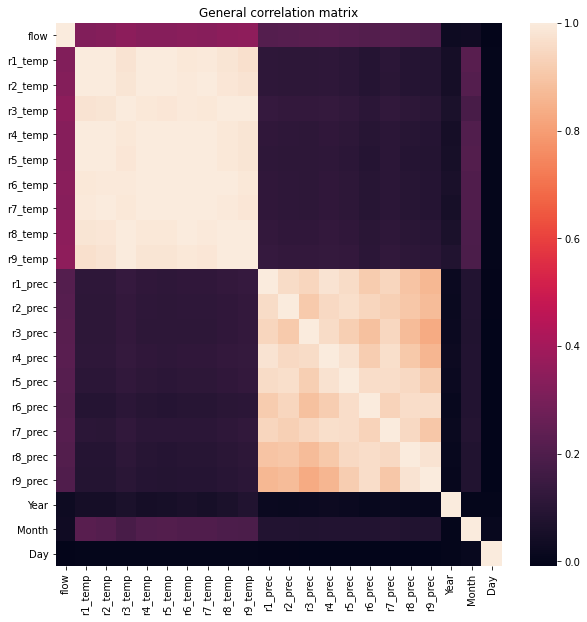

In [10]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr()).set(title='General correlation matrix')

In [11]:
df.corr()

,flow,r1_temp,r2_temp,r3_temp,r4_temp,r5_temp,r6_temp,r7_temp,r8_temp,r9_temp,...,r3_prec,r4_prec,r5_prec,r6_prec,r7_prec,r8_prec,r9_prec,Year,Month,Day
flow,1.000000,0.321395,0.328661,0.347238,0.331841,0.331223,0.340982,0.334333,0.346066,0.353181,...,0.222361,0.223283,0.218239,0.208095,0.218854,0.209890,0.200689,0.026216,0.032599,-0.005373
r1_temp,0.321395,1.000000,0.998956,0.977156,0.996456,0.997461,0.990467,0.994349,0.982109,0.971150,...,0.109049,0.114553,0.107296,0.090989,0.104836,0.092479,0.087871,0.046441,0.222773,-0.000117
r2_temp,0.328661,0.998956,1.000000,0.982988,0.998648,0.999480,0.994931,0.997284,0.987611,0.977994,...,0.108717,0.114058,0.106960,0.090575,0.104553,0.092335,0.087635,0.048775,0.213099,-0.000390
r3_temp,0.347238,0.977156,0.982988,1.000000,0.988485,0.986217,0.993135,0.991132,0.998233,0.996440,...,0.124473,0.130504,0.123710,0.106679,0.121591,0.109213,0.103655,0.064195,0.181821,-0.001000
r4_temp,0.331841,0.996456,0.998648,0.988485,1.000000,0.999552,0.996896,0.999492,0.991544,0.982389,...,0.111583,0.117214,0.110174,0.093597,0.107691,0.095358,0.090506,0.048643,0.204929,-0.000866
r5_temp,0.331223,0.997461,0.999480,0.986217,0.999552,1.000000,0.996800,0.998846,0.990508,0.981441,...,0.109140,0.114523,0.107481,0.091055,0.105057,0.092816,0.088088,0.049613,0.209323,-0.000478
r6_temp,0.340982,0.990467,0.994931,0.993135,0.996896,0.996800,1.000000,0.998118,0.996885,0.991050,...,0.112489,0.117749,0.110771,0.093963,0.108584,0.096431,0.091323,0.057453,0.201138,-0.000519
r7_temp,0.334333,0.994349,0.997284,0.991132,0.999492,0.998846,0.998118,1.000000,0.994130,0.985909,...,0.112269,0.118000,0.110977,0.094312,0.108508,0.096177,0.091289,0.051190,0.203006,-0.000611
r8_temp,0.346066,0.982109,0.987611,0.998233,0.991544,0.990508,0.996885,0.994130,1.000000,0.997029,...,0.119536,0.125286,0.118328,0.101300,0.116224,0.103903,0.098589,0.064598,0.192765,-0.000223
r9_temp,0.353181,0.971150,0.977994,0.996440,0.982389,0.981441,0.991050,0.985909,0.997029,1.000000,...,0.126328,0.132141,0.125152,0.107952,0.123297,0.110678,0.105094,0.078146,0.191338,0.000099


## Mapper

In [16]:
df.columns

Index(['date', 'flow', 'r1_temp', 'r2_temp', 'r3_temp', 'r4_temp', 'r5_temp',
       'r6_temp', 'r7_temp', 'r8_temp', 'r9_temp', 'r1_prec', 'r2_prec',
       'r3_prec', 'r4_prec', 'r5_prec', 'r6_prec', 'r7_prec', 'r8_prec',
       'r9_prec', 'Year', 'Month', 'Day', 'Season'],
      dtype='object')

In [18]:
mapper = km.KeplerMapper(verbose=2)
projected_data = mapper.fit_transform(df.drop(columns=['date', 'Season']), projection=sklearn.manifold.TSNE())
graph = mapper.map(
    projected_data,
    clusterer=sklearn.cluster.DBSCAN(),
    cover=km.Cover(5, 0.4),
)

KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: TSNE()
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (21178, 22)

..Projecting data using: 
	TSNE(verbose=2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 21178 samples in 1.464s...
[t-SNE] Computed neighbors for 21178 samples in 14.235s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21178
[t-SNE] Computed conditional probabilities for sample 2000 / 21178
[t-SNE] Computed conditional probabilities for sample 3000 / 21178
[t-SNE] Computed conditional probabilities for sample 4000 / 21178
[t-SNE] Computed conditional probabilities for sample 5000 / 21178
[t-SNE] Computed conditional probabilities for sample 6000 / 21178
[t-SNE] Computed conditional probabilities for sample 7000 / 21178
[t-SNE] Computed conditional probabilities for sample 8000 / 21178
[t-SNE] Computed conditional probabilities for sample 9000 / 21178
[t-SNE] Computed conditiona

In [19]:
_ = mapper.visualize(graph,
                        X=projected_data,
                        path_html="output.html")

Wrote visualization to: output.html
